# Anomalies in RU2020 vote: Alt-visuals

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned.csv')
df['turnout'] = df['given']/np.maximum(1, df['nominal'])
df['support'] = df['yes']/np.maximum(1, df['given'])

In [3]:
def noisify(df1):
    nexp = 1
    sigma = 0.005 # Noisification coefficient
    temp = df1.copy()
    temp['given'] = np.round(temp['nominal']*(temp['turnout']+np.random.normal(size=len(temp))*sigma))
    temp['given'] = np.maximum(0, np.minimum(temp['nominal'], temp['given'])).astype(int)
    temp['yes'] = np.round(temp['given']*(temp['turnout']+np.random.normal(size=len(temp))*sigma))
    temp['yes'] = np.maximum(0, np.minimum(temp['given'], temp['yes'])).astype(int)
    temp['turnout'] = temp.given / temp.nominal
    temp['support'] = temp.yes / temp.given
    return temp

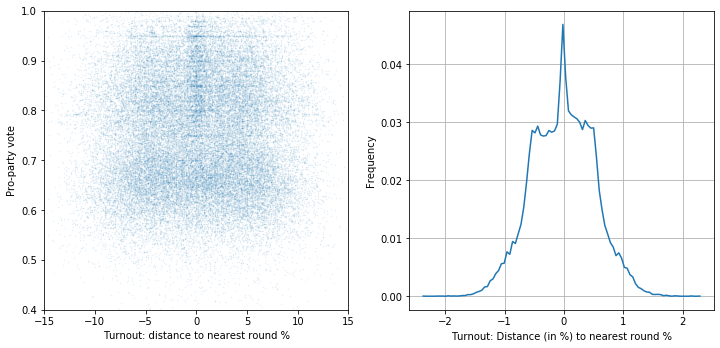

In [11]:
ind = (df.nominal > 1000) # Only large polling stations
df1 = df.copy()[ind]
#df1 = noisify(df)[ind]

df1['closest_achievable_turnout'] = np.round(df1.given/df1.nominal*100)/100*df1.nominal
plt.figure(figsize=(12,5.5), facecolor='white');
plt.subplot(121);
plt.plot(df1.given-df1.closest_achievable_turnout, df1.support, '.', markersize=1, alpha=0.1);
plt.ylim(0.4, 1);
plt.xlim(-15, 15);
plt.xlabel('Turnout: distance to nearest round %');
plt.ylabel('Pro-party vote');
plt.subplot(122);
x = np.histogram((df1.given-df1.closest_achievable_turnout)/df1.given*100, bins=100)
plt.plot(x[1][:-1], x[0]/np.sum(x[0]));
plt.grid();
plt.xlabel('Turnout: Distance (in %) to nearest round %');
plt.ylabel('Frequency');

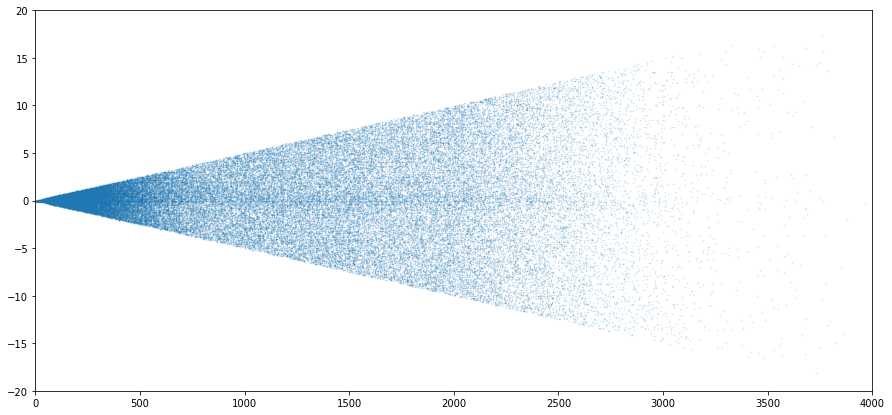

In [5]:
df['closest_achievable_turnout'] = np.round(df.turnout*100)/100*df.nominal
plt.figure(figsize=(15,7), facecolor='white');
plt.plot(df.nominal, df.given-df.closest_achievable_turnout, '.', markersize=1, alpha=0.2);
plt.ylim(-20, 20);
plt.xlim(0, 4000);

In [14]:
# Round %% example:
n = 1111
k = round(n*0.95)
print(k, k/n)

1055 0.9495949594959496


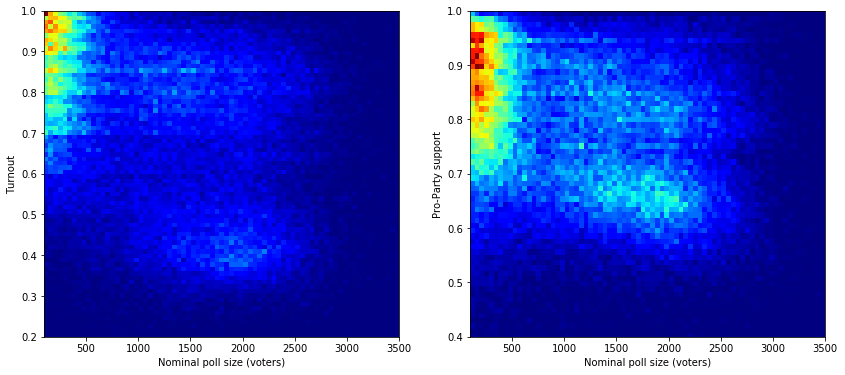

In [6]:

threshold = 100
ind = (df.nominal > threshold)

plt.figure(figsize=(14,6), facecolor='white')
plt.subplot(121)
plt.hist2d(df.nominal[ind], df.turnout[ind], bins=(150,80), cmap='jet');
plt.xlim(threshold, 3500);
plt.ylim(0.2, 1);
plt.xlabel('Nominal poll size (voters)');
plt.ylabel('Turnout');

plt.subplot(122)
plt.hist2d(df.nominal[ind], df.support[ind], bins=(150,100), cmap='jet');
plt.xlim(threshold, 3500);
plt.ylim(0.4, 1);
plt.xlabel('Nominal poll size (voters)');
plt.ylabel('Pro-Party support');

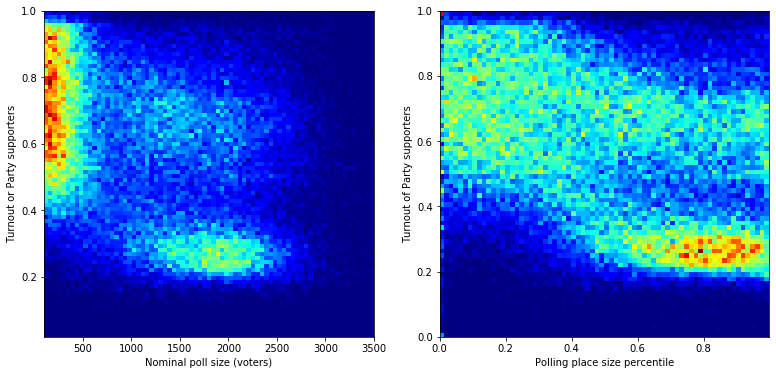

In [7]:
threshold = 100
ind = (df.nominal > threshold)
plt.figure(figsize=(13,6), facecolor='white')
plt.subplot(121)
plt.hist2d(df.nominal[ind], df.yes[ind]/np.maximum(1, df.nominal[ind]), bins=(150,80), cmap='jet');
plt.xlim(threshold, 3500);
plt.xlabel('Nominal poll size (voters)');
plt.ylabel('Turnout or Party supporters');

plt.subplot(122)
percentile = np.argsort(np.argsort(df.nominal.values))/len(df)
plt.hist2d(percentile, df.yes/np.maximum(1, df.nominal), bins=70, cmap='jet');
plt.xlabel('Polling place size percentile');
plt.ylabel('Turnout of Party supporters');

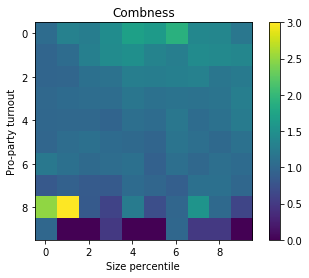

In [8]:
def measure_comb(vals):
    """For values between 0 and 1, measure how comb-like they are."""
    x = np.histogram(vals, bins=np.arange(0, 1.005, 0.005)-0.002, range=(0,1))
    # This small offset of 0.002 to account for rounding errors around 1%-level values
    return np.sum(x[0][np.arange(50,100)*2])/max(1,np.sum(x[0][np.arange(50,100)*2 + 1]))

df['size_percentile'] = np.argsort(np.argsort(df.nominal))/len(df)
df['yes_turnout'] = df.yes / np.maximum(1, df.nominal)

combiness = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        ind = (1*(df.size_percentile>i/10)*(df.size_percentile<=(i+1)/10)*
                 (df.yes_turnout>j/10)*(df.yes_turnout<=(j+1)/10) == 1)
        if np.sum(ind) < 1:
            combiness[i,j] = 0
        else:
            combiness[i,j] = (measure_comb(df[ind].support)+measure_comb(df[ind].turnout))/2

#print((combiness*10).astype(int))
plt.imshow(np.rot90(combiness));
plt.colorbar();
plt.xlabel('Size percentile');
plt.ylabel('Pro-party turnout');
plt.title('Combness');

# Dead-end stem plot

In [9]:
df1 = df[df.region=='Москва']
ind = np.argsort(df1.nominal)
df1 = df1.iloc[ind]

Text(0, 0.5, 'Голоса: НЕТ - ДА - Испорченные')

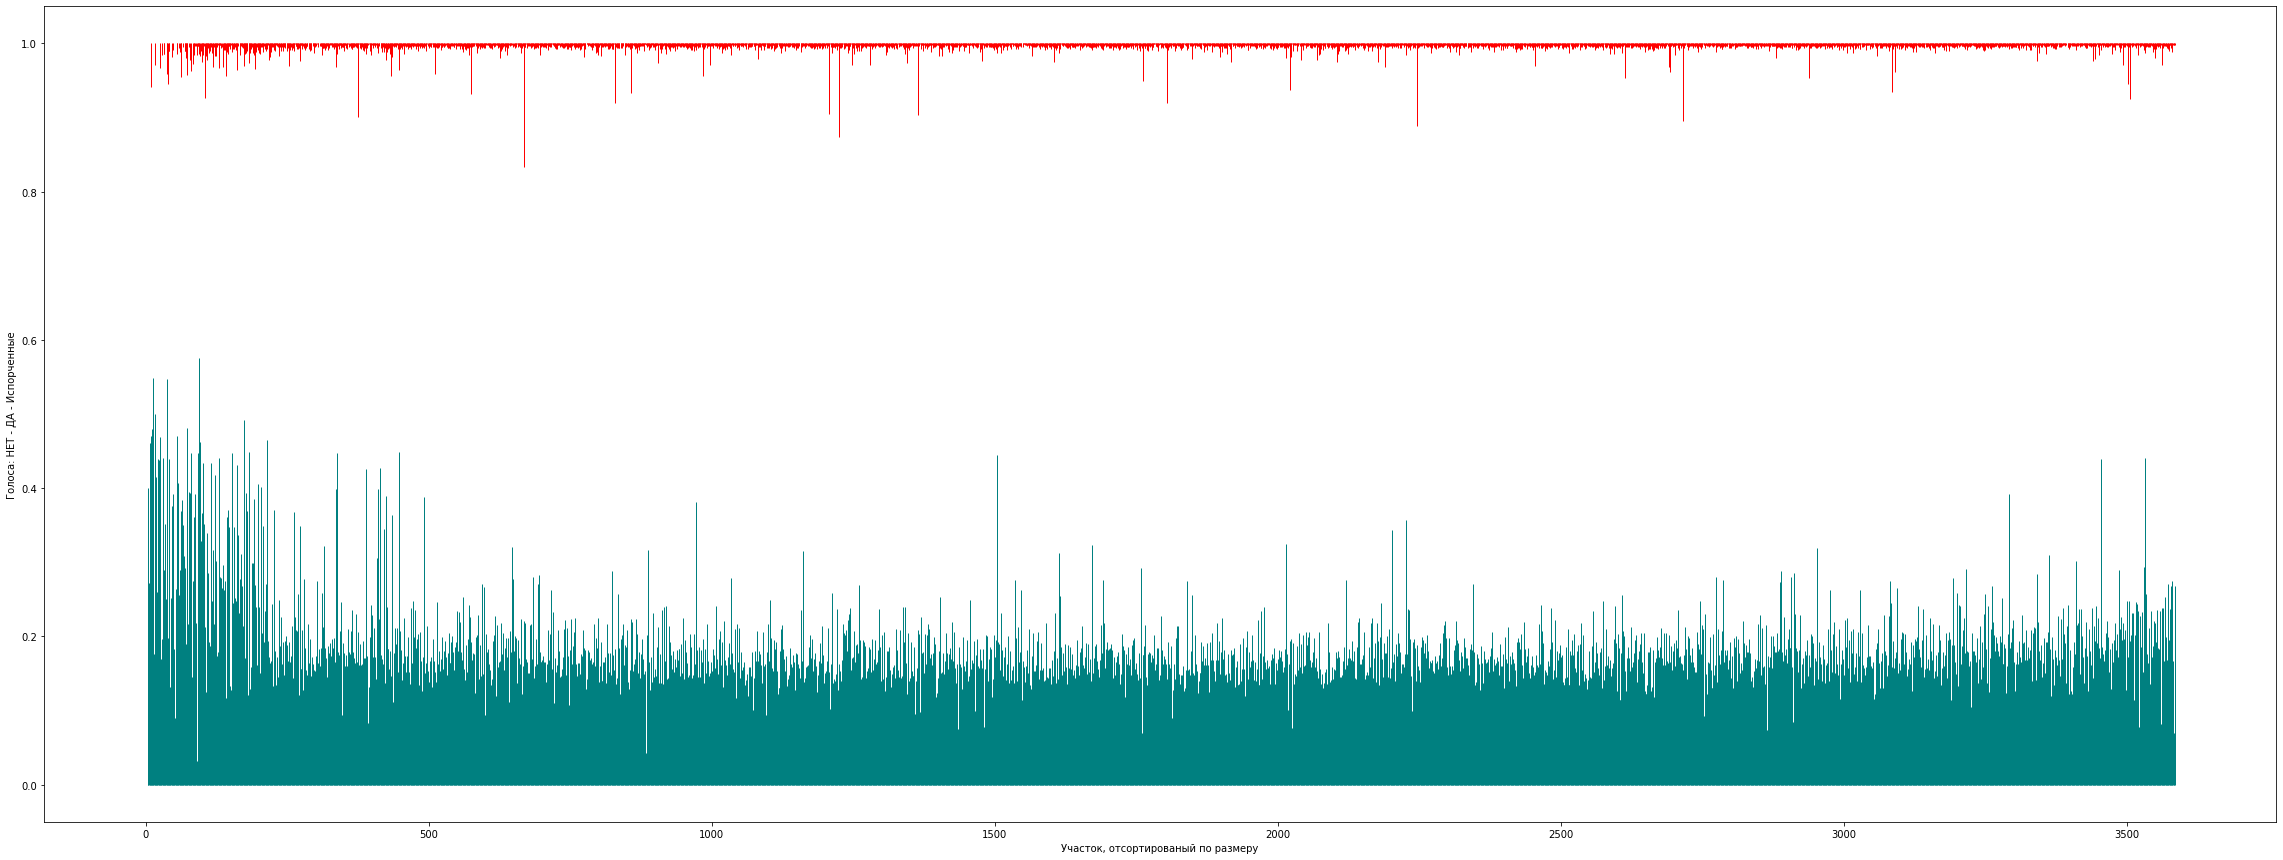

In [10]:

plt.figure(figsize=(40,15), facecolor='white');

x = np.arange(len(df1))
norm = np.maximum(1, df1.nominal.values)

plt.vlines(x, 0, df1.no.values / norm, color='teal', alpha=1, linewidth=1);
plt.vlines(x, 1-df1.damaged.values/norm, 1, color='red', linewidth=1);
plt.xlabel('Участок, отсортированый по размеру')
plt.ylabel('Голоса: НЕТ - ДА - Испорченные')